# 背景信息

多年以来电子商务业务快速发展，尤其是移动客户端发展迅猛，移动互联网时代的到来让原本就方便快捷的网上购物变得更加便利。

但随着互联网人口红利的消失，利用大数据分析深入地了解用户、进行精准化运营变得越来越重要，**用户行为分析**可以让产品更加详细、清楚地了解用户的行为习惯，从而找出网站、APP、推广渠道等存在的问题，更好的提高业务转化率。

京东作为国内知名的电商交易平台，具有巨大的流量优势。本案例提供的**订单消费数据**为分析对象，结合实际业务和应用场景，从不同维度和指标展开分析，探索电子商务平台的用户消费行为特点，**构建用户分群 RFM 模型，总结用户消费行为特点并提出营销建议**。

# Part 1 数据导入及数据清洗与整理

1. 数据导入及清洗
2. 数据整理

## Step 1 数据导入及清洗

In [2]:
# 导入所需要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 数据文件路径
path = r'C:\Users\linzhiliao\Desktop\实训营\数据分析实训营\all_data表单\all_data (1).csv'

# 读取京东电商销售数据集
df = pd.read_csv(path, encoding='utf-8')

In [3]:
# 查看数据集基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单号     115878 non-null  object 
 1   顾客ID    115878 non-null  object 
 2   订单时间    115878 non-null  object 
 3   付款金额    115878 non-null  float64
 4   商品ID    115878 non-null  object 
 5   商品描述    115878 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
# 查看缺失值
df.isnull().sum()

订单号     0
顾客ID    0
订单时间    0
付款金额    0
商品ID    0
商品描述    0
dtype: int64

In [5]:
# 查看重复值
df[df.duplicated()]

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017/4/20 17:15,267.80,a5a0e71a81ae65aa335e71c06261e260,housewares
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017/4/20 17:15,267.80,a5a0e71a81ae65aa335e71c06261e260,housewares
10,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017/4/20 17:15,267.80,a5a0e71a81ae65aa335e71c06261e260,housewares
11,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,2017/4/20 17:15,267.80,a5a0e71a81ae65aa335e71c06261e260,housewares
24,c49be9a11fd13933307cc6a19b03a895,a972623b3481cbfd95fa776b0067e554,2018/5/15 18:54,928.68,97f1396a5a1f7c07ba51784efdec44b8,housewares
...,...,...,...,...,...,...
115714,5020a3db49225f967490d76021c7d13a,5a8b3e70cb6bfdbc353bcb5ae2b4d4eb,2018/1/28 23:36,188.45,3fdb534dccf5bc9ab0406944b913787d,diapers_and_hygiene
115715,5020a3db49225f967490d76021c7d13a,5a8b3e70cb6bfdbc353bcb5ae2b4d4eb,2018/1/28 23:36,188.45,3fdb534dccf5bc9ab0406944b913787d,diapers_and_hygiene
115716,5020a3db49225f967490d76021c7d13a,5a8b3e70cb6bfdbc353bcb5ae2b4d4eb,2018/1/28 23:36,188.45,3fdb534dccf5bc9ab0406944b913787d,diapers_and_hygiene
115737,b144e2ac9863ed27bc59dbe4dd2f8773,49bc0bacf1f213a2d30e240c648ccb01,2017/12/6 14:04,99.70,f83fd2b539bc73678c65be8d418be8c1,diapers_and_hygiene


**可以看出有11039行重复值，此处将他们剔除。**

In [6]:
# 删除重复值
df = df.drop_duplicates()
df

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,18.12,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,2.00,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017/10/2 10:56,18.59,87285b34884572647811a353c7ac498a,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017/8/15 18:29,37.77,87285b34884572647811a353c7ac498a,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017/8/2 18:24,37.77,87285b34884572647811a353c7ac498a,housewares
...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018/8/3 21:35,33.69,4a24717893a6c8f3cfcf9843b8987d15,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018/7/23 18:35,84.63,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018/7/23 18:35,84.63,eacb104882d39ffb53140b1d1860a7c3,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017/1/26 11:09,209.06,6c7a0a349ad11817745e3ad58abd5c79,security_and_services


In [7]:
# 将'日期'字段转换为日期格式
df['订单时间'] = df['订单时间'].astype('datetime64')

In [8]:
df['年份']=df['订单时间'].dt.year
df['月份']=df['订单时间'].dt.month
df['星期几']=df['订单时间'].dt.weekday

# Part 2 每月消费趋势分析

> 主要针对消费金额、消费顾客数、订单数以及商品购买量四个指标，分析 2017-2018 年每个月这四个指标的变化趋势。

1. 消费金额分析
2. 消费顾客数分析
3. 订单数分析
4. 商品购买量分析

## Step 1 消费金额分析

目的：绘制 2017-2018 年每月消费金额对比图

### 1.分组聚合得到 2017 年各个月份的消费顾客数和消费金额:

In [9]:
# 提取 2017 年的数据，分组聚合得到每个月每个顾客的付款金额总和，保留年份字段
df_2017_month_customer = df[df['年份'] == 2017].groupby(['月份','顾客ID']).agg({'付款金额':'sum', '年份':'mean'})
df_2017_month_customer.head(2)

付款金额      年份
月份 顾客ID                                            
1  0040b00970e2139e8c43b647c0da5305   41.93  2017.0
   0051337a96842850e1ec728dd158f4b3  237.99  2017.0

In [10]:
# 对上述结果进行行索引重置
df_2017_month_customer = df_2017_month_customer.reset_index()
df_2017_month_customer.head(2)

,月份,顾客ID,付款金额,年份
0,1,0040b00970e2139e8c43b647c0da5305,41.93,2017.0
1,1,0051337a96842850e1ec728dd158f4b3,237.99,2017.0


In [11]:
# 对上面得到的结果，分组聚合得到每个月的顾客总数，付款金额总和，保留年份字段，并对结果进行行索引重置
customers_payment_2017 = df_2017_month_customer.groupby('月份').agg({'顾客ID':'count','付款金额':'sum', '年份':'mean'}).reset_index()
customers_payment_2017.head(2)

,月份,顾客ID,付款金额,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


In [12]:
# 字段重命名
customers_payment_2017 = customers_payment_2017.rename(columns={'顾客ID':'顾客总数','付款金额':'付款金额总和'})
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


### 2.分组聚合得到 2018 年各个月份的消费顾客数和消费金额:

In [13]:
# 提取 2018 年的数据，分组聚合得到每个月每个顾客的付款金额总和，保留年份字段，对结果进行行索引重置
df_2018_month_customer = df[df['年份'] == 2018].groupby(['月份','顾客ID']).agg({'付款金额':'sum', '年份':'mean'}).reset_index()
df_2018_month_customer.head(2)

,月份,顾客ID,付款金额,年份
0,1,00104a47c29da701ce41ee52077587d9,100.34,2018.0
1,1,0013280441d86a4f7a8006efdaf1b0fe,162.15,2018.0


In [14]:
# 对上面得到的结果，分组聚合得到每个月的顾客总数，付款金额总和，保留年份字段，对结果进行行索引重置
customers_payment_2018 = df_2018_month_customer.groupby('月份').agg({'顾客ID':'count','付款金额':'sum', '年份':'mean'}).reset_index()
customers_payment_2018.head(2)

,月份,顾客ID,付款金额,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [15]:
# 字段重命名
customers_payment_2018 = customers_payment_2018.rename(columns={'顾客ID':'顾客总数','付款金额':'付款金额总和'})
customers_payment_2018.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [16]:
# 整合 2017 年和 2018 年数据
customers_payment_all = customers_payment_2017.append(customers_payment_2018)
customers_payment_all.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


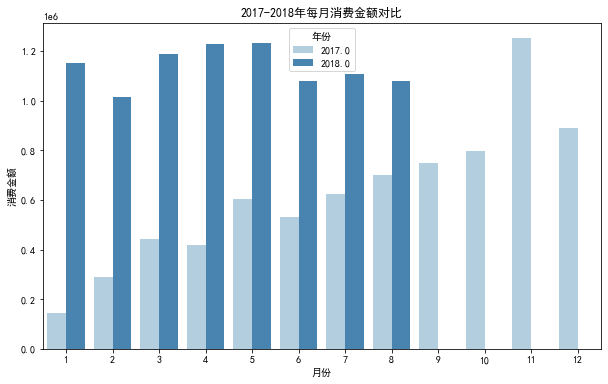

In [17]:
# 设置字体
plt.rc("font",family='SimHei')
# 设置画布大小
plt.rcParams['figure.figsize'] = 10, 6

# 作图表示 2017-2018 年各个月份消费金额趋势
sns.barplot(x='月份', y='付款金额总和', data=customers_payment_all, palette='Blues', hue='年份')
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月消费金额对比') # 设置图片标题
plt.show()

根据每月消费金额趋势图显示，2017年平台用户消费金额不断上升，业务增长态势明显，11月份达到最高峰，消费金额为120万以上，11月11日是一年一度的购物节，双十一折扣是促进消费的重要影响因素；2018年1-8月消费金额比2017年12月高，每月消费金额均超过100万，业务规模走势相对平稳，增长幅度比去年同期小。

## Step 2 消费顾客数分析

目的：绘制 2017-2018 年各个月份的消费顾客数趋势对比图

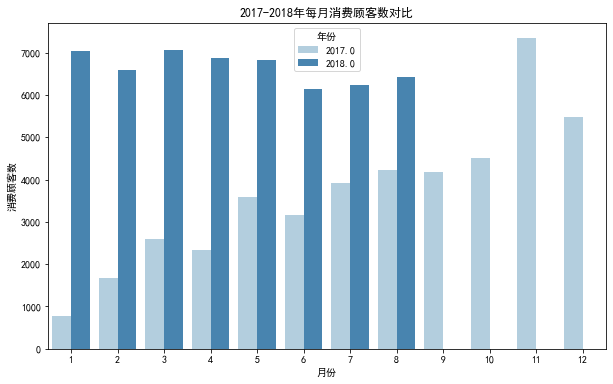

In [18]:
# 作图表示 2017-2018 年各个月份的消费用户数趋势
sns.barplot(x='月份', y='顾客总数', data=customers_payment_all, palette='Blues', hue='年份').get_figure().savefig("temp.jpg",dpi=1080,bbox_inches = 'tight')
plt.xlabel('月份')        # 设置x轴标签
plt.ylabel('消费顾客数')  # 设置y轴标签
plt.title('2017-2018年每月消费顾客数对比') # 设置图片标题
plt.show() #

根据每月消费顾客数的趋势图显示，2017年平台消费顾客数不断上升，业务增长态势明显，同样11月份达到最高峰，消费顾客数将近7200人，11月11日是一年一度的购物节，双十一折扣是促进消费的重要影响因素；2018年1-8月消费顾客数的整体水平比2017年12月高，每月消费顾客数均超过6000人，业务规模走势相对平稳，增长幅度比去年同期小。

## Step 3 订单数分析

目的：绘制 2017-2018 年每月订单数趋势对比图

### 1.分组聚合得到 2017 年各个月份的订单总数：

In [19]:
# 提取 2017 年的数据，分组聚合得到每个月的订单总数，保留年份字段
orders_2017 = df[df['年份'] == 2017].groupby('月份').agg({'订单号':'count','年份':'mean'})
orders_2017.head(2)

,订单号,年份
月份,,
1,858,2017.0
2,1825,2017.0


In [20]:
# 对结果进行行索引重置
orders_2017 = orders_2017.reset_index()
orders_2017.head(2)

,月份,订单号,年份
0,1,858,2017.0
1,2,1825,2017.0


In [21]:
# 字段重命名
orders_2017 = orders_2017.rename(columns={'订单号':'订单总数'})
orders_2017.head(2)

,月份,订单总数,年份
0,1,858,2017.0
1,2,1825,2017.0


### 2.分组聚合得到 2018 年各个月份的订单总数：

In [22]:
# 提取 2018 年的数据，分组聚合得到每个月的订单总数，保留年份字段，对结果进行行索引重置
orders_2018 = df[df['年份'] == 2018].groupby('月份').agg({'订单号':'count','年份':'mean'}).reset_index()
orders_2018.head(2)

,月份,订单号,年份
0,1,7604,2018.0
1,2,6966,2018.0


In [23]:
# 字段重命名
orders_2018 = orders_2018.rename(columns={'订单号':'订单总数'})
orders_2018.head(2)

,月份,订单总数,年份
0,1,7604,2018.0
1,2,6966,2018.0


In [24]:
# 整合 2017 年和 2018 年数据
orders_all = orders_2017.append(orders_2018)
orders_all.head(2)

,月份,订单总数,年份
0,1,858,2017.0
1,2,1825,2017.0


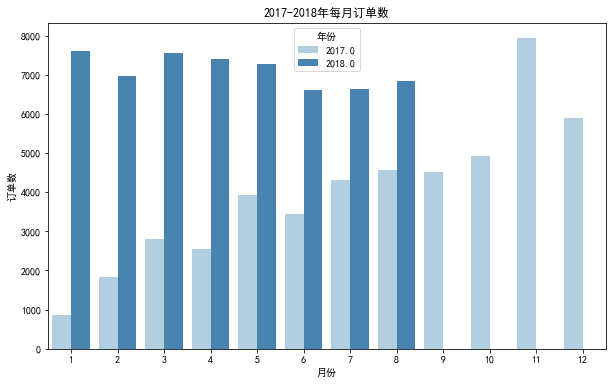

In [25]:
# 作图表示 2017 年和 2018 年各个月份订单数趋势
sns.barplot(x='月份', y='订单总数', data=orders_all, palette='Blues', hue='年份')
plt.xlabel('月份')       # 设置x轴标签
plt.ylabel('订单数')   # 设置y轴标签
plt.title('2017-2018年每月订单数')  # 设置图片标题
plt.show()

随着平台业务发展，2017年，消费订单数呈上升趋势，11月份消费订单数逼近8000笔；2018年1-8月，消费订单数高于上年年底，数目在6000-8000之间波动。

In [26]:
df.to_csv('clean_data_ab.csv')

## Step 4 商品购买量分析

目的：绘制 2017-2018 年每月商品购买数趋势对比图

### 1.分组聚合得到 2017 年各个月份的商品购买总数：

In [47]:
# 提取 2017 年的数据，对'月份'和'商品ID'分组聚合，保留年份字段
df_2017_month_product = df[df['年份'] == 2017].groupby(['月份','商品ID']).agg({'年份': 'sum'})
df_2017_month_product

年份
月份 商品ID                                  
1  001c5d71ac6ad696d22315953758fa04  2017
   00be617b58175bf207fd35910d5097a4  2017
   010a3a47c14f1295796c08419f32cef6  2017
   014a8a503291921f7b004a5215bb3c36  2017
   01586bfbe1d5449887f1cac4ad1fbd02  2017
...                                   ...
12 ffc0b406806006602c5853b00ab5f7fd  2017
   ffce5ed9e0bcc2e46796b988cdac733b  2017
   ffcfaba393e8ef71937c6e8421bc2868  2017
   ffd34459c21034d1da6df9800de0d7a3  2017
   fff0a542c3c62682f23305214eaeaa24  6051

[28272 rows x 1 columns]

In [48]:
# 对结果进行行索引重置
df_2017_month_product = df_2017_month_product.reset_index()
df_2017_month_product.head(2)

,月份,商品ID,年份
0,1,001c5d71ac6ad696d22315953758fa04,2017
1,1,00be617b58175bf207fd35910d5097a4,2017


In [46]:
# 对 df_2017_month_product 分组聚合得到每个月的商品总数，保留年份字段，并对结果进行行索引重置
products_2017 = df_2017_month_product.groupby('月份').agg({'商品ID':'count','年份':'mean'}).reset_index()
products_2017

,月份,商品ID,年份
0,1,604,2865.208609
1,2,1226,3002.467374
2,3,1736,3268.330069
3,4,1620,3166.191975
4,5,2303,3443.701259
5,6,1995,3488.045113
6,7,2483,3503.552557
7,8,2808,3284.089744
8,9,2762,3298.620203
9,10,2943,3369.205573


In [ ]:
# 字段重命名
products_2017 = products_2017.rename(columns={'商品ID':'商品总数'})
products_2017.head(2)

,月份,商品总数,年份
0,1,604,2865.208609
1,2,1226,3002.467374


### 2.分组聚合得到 2018 年各个月份的商品购买总数:

In [ ]:
# 提取 2018 年的数据，对'月份'和'商品ID'分组聚合，，保留年份字段，并对结果进行行索引重置
df_2018_month_product = df[df['年份'] == 2018].groupby(['月份','商品ID']).agg({'年份':'mean'}).reset_index()
df_2018_month_product.head(2)

,月份,商品ID,年份
0,1,002959d7a0b0990fe2d69988affcbc80,2018.0
1,1,0043c62d00db47eff6a6bc4cf6bfaeda,2018.0


In [ ]:
# 对 df_2018_month_product 分组聚合得到每个月的商品总数，保留年份字段，并对结果进行行索引重置
products_2018 = df_2018_month_product.groupby('月份').agg({'商品ID':'count','年份':'mean'}).reset_index()
products_2018.head(2)

,月份,商品ID,年份
0,1,4015,2018.0
1,2,3770,2018.0


In [ ]:
# 字段重命名
products_2018 = products_2018.rename(columns={'商品ID':'商品总数'})
products_2018.head(2)

,月份,商品总数,年份
0,1,4015,2018.0
1,2,3770,2018.0


In [ ]:
# 整合 2017 年和 2018 年数据
products_all = products_2017.append(products_2018)
products_all.head(2)

,月份,商品总数,年份
0,1,604,2865.208609
1,2,1226,3002.467374


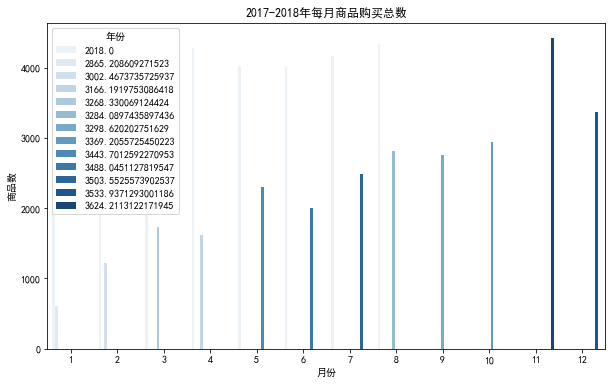

In [ ]:
# 作图表示 2017-2018 年各个月份商品购买总数
sns.barplot(x='月份', y='商品总数', data=products_all, palette='Blues', hue='年份')
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('商品数')  # 设置y轴标签
plt.title('2017-2018年每月商品购买总数')  # 设置图片标题
plt.show()

In [ ]:
df.to_csv('clean_data_cd.csv')

随着平台业务发展，2017年，产品购买量呈上升趋势，11月份产品购买量突破4000件；2018年1-8月，消费订单数和产品购买量均高于上年年底，数目在3000-5000之间波动。

# Part 3 顾客个体消费分析

> 主要针对顾客消费行为进行分析，找出顾客消费规律。

1. 顾客消费金额及每月平均消费金额
2. 顾客购买商品数目分析
3. 每月订单平均消费金额分析

## Step 1 顾客消费金额及每月平均消费金额分析

### 1. 顾客消费金额分析：

In [ ]:
# 分组聚合得到每个顾客的付款金额总和，并对结果进行行索引重置
df_customer_payment = df.groupby('顾客ID')['付款金额'].sum().reset_index()
df_customer_payment.head(2)

,顾客ID,付款金额
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41


In [ ]:
# 顾客消费金额描述性统计
df_customer_payment['付款金额'].describe()

count    97255.000000
mean       170.606202
std        257.272313
min          6.150000
25%         62.050000
50%        106.230000
75%        182.980000
max      15978.650000
Name: 付款金额, dtype: float64

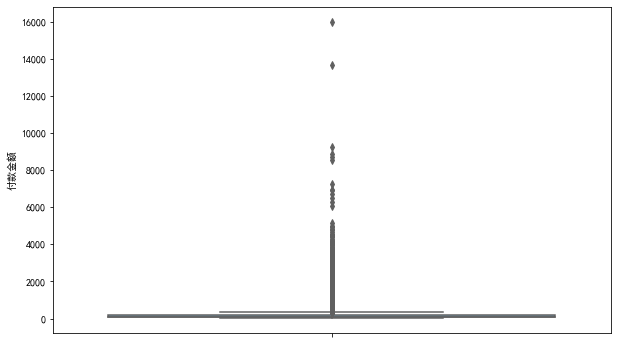

In [ ]:
# 绘制顾客消费金额箱图
sns.boxplot(y="付款金额", data=df_customer_payment, palette='Blues')
plt.show()

**顾客消费金额呈明显的右长尾分布。**

### 分离正常值与异常值，使用 1.5 IQR 规则：

In [ ]:
# 计算 IQR
Q1 = df_customer_payment['付款金额'].quantile(0.25)
Q3 = df_customer_payment['付款金额'].quantile(0.75)
IQR = Q3 - Q1
IQR



120.92999999999999

In [ ]:
# 分离出正常值
df_box_normal = df_customer_payment[(df_customer_payment['付款金额'] > Q1 - 1.5 * IQR ) & (df_customer_payment['付款金额'] < Q3 + 1.5 * IQR)]['付款金额']

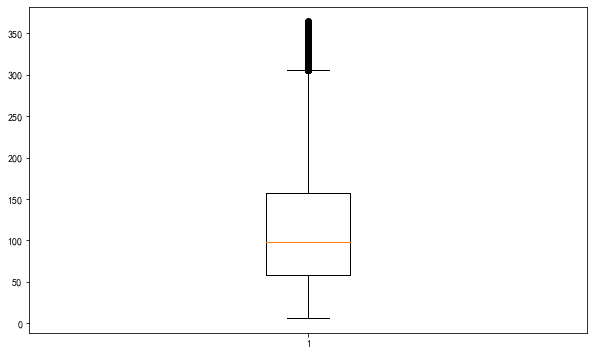

In [ ]:
# 画出正常值的分布图
plt.boxplot(df_box_normal)
plt.show()

In [ ]:
df_box_normal.describe()

count    88893.000000
mean       116.902960
std         75.460158
min          6.150000
25%         58.480000
50%         97.350000
75%        157.450000
max        364.340000
Name: 付款金额, dtype: float64

**从正常值的分布图中可以看出，绝大多数用户的消费金额小于 160，大部分用户集中于较低的消费档次。**

In [ ]:
# 计算异常值占整体的比例
outlier_ratio = (len(df_customer_payment) - len(df_box_normal))/len(df_customer_payment)*100
outlier_ratio

8.598015526194027

**存在少数金额偏高的消费用户，仅占不到9%。**

### 2.每月顾客平均消费金额分析：

In [ ]:
# 查看数据
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


In [ ]:
# 计算 2017 年每个月中，平均每个顾客的消费金额
customers_payment_2017['avg_payment'] = (customers_payment_2017['付款金额总和']/customers_payment_2017['顾客总数'])
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,778,142637.61,2017.0,183.338830
1,2,1681,290368.21,2017.0,172.735402


In [ ]:
# 计算结果保留 2 位小数
customers_payment_2017['avg_payment'] = customers_payment_2017['avg_payment'].round(2)
customers_payment_2017.head(2)

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74


In [ ]:
# 查看数据
customers_payment_2018.head(2)

,月份,顾客总数,付款金额总和,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [ ]:
# 计算 2018 年每个月中，平均每个顾客的消费金额，结果保留 2 位小数
customers_payment_2018['avg_payment'] = (customers_payment_2018['付款金额总和']/customers_payment_2018['顾客总数']).round(2)
customers_payment_2018.head(2)

,月份,顾客总数,付款金额总和,年份,avg_payment
0,1,7039,1153357.23,2018.0,163.85
1,2,6586,1014437.97,2018.0,154.03


In [ ]:
# 整合 2017 年和 2018 年数据
customers_payment_avg_all = customers_payment_2017.append(customers_payment_2018).reset_index()
customers_payment_avg_all

,index,月份,顾客总数,付款金额总和,年份,avg_payment
0,0,1,778,142637.61,2017.0,183.34
1,1,2,1681,290368.21,2017.0,172.74
2,2,3,2589,444137.58,2017.0,171.55
3,3,4,2327,417652.67,2017.0,179.48
4,4,5,3576,605651.52,2017.0,169.37
5,5,6,3162,529559.96,2017.0,167.48
6,6,7,3918,623040.79,2017.0,159.02
7,7,8,4227,700341.17,2017.0,165.68
8,8,9,4183,747830.63,2017.0,178.78
9,9,10,4513,798755.43,2017.0,176.99


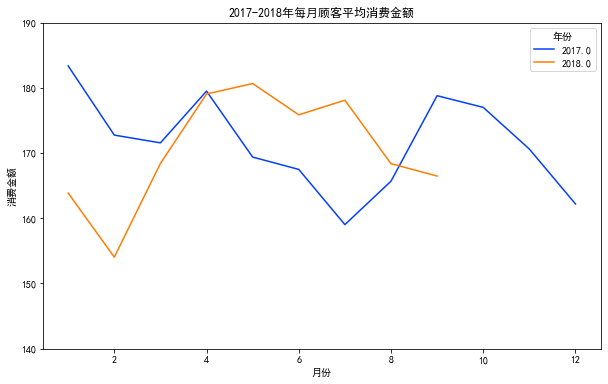

In [ ]:
# 作图表示 2017-2018 年各个月份顾客平均消费金额
sns.lineplot(x='月份', y='avg_payment',data=customers_payment_avg_all, hue='年份', palette='bright')
plt.ylim(140,190)
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月顾客平均消费金额')  # 设置图片标题
plt.show()

每月顾客平均消费金额（客单价） = 每月消费金额 / 每月消费顾客数，平台每月顾客平均消费金额在 150-190 之间，平台保持规模发展的同时需提高顾客人均消费水平，狠抓高质量用户。

## Step 2 顾客购买商品数分析

目的：绘制顾客每单购买商品数的分布图

In [ ]:
# 分组聚合得到每个订单内的商品数量，并对结果进行行索引重置
df_order_product = df.groupby(['订单号'])['商品ID'].count().reset_index()
df_order_product.head(2)

,订单号,商品ID
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1


In [ ]:
# 字段重命名
df_order_product = df_order_product.rename(columns={'商品ID':'商品数'})
df_order_product.head(2)

,订单号,商品数
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1


In [ ]:
# 对上述结果分组聚合得到各个商品数对应的订单的数目
df_product_order = df_order_product.groupby('商品数')['订单号'].count()
df_product_order.head(2)

商品数
1    91304
2     5094
Name: 订单号, dtype: int64

In [ ]:
# 由上述结果中的订单数目，计算出占所有订单数的百分比数字
df_product_order_ratio = df_product_order/len(df)*100
df_product_order_ratio.head(2)

商品数
1    87.089728
2     4.858879
Name: 订单号, dtype: float64

In [ ]:
# 将上述计算结果保留两位小数，转换成 dataframe，并对结果进行行索引重置
products_dist = df_product_order_ratio.round(2).to_frame()
products_dist.head(2)

,订单号
商品数,
1,87.09
2,4.86


In [ ]:
# 对结果进行行索引重置
products_dist = products_dist.reset_index()
products_dist.head(2)

,商品数,订单号
0,1,87.09
1,2,4.86


In [ ]:
# 字段重命名
products_dist = products_dist.rename(columns={'订单号':'订单数占比'})

In [ ]:
# 查看结果
products_dist

,商品数,订单数占比
0,1,87.09
1,2,4.86
2,3,0.51
3,4,0.20
4,5,0.02
5,6,0.04
6,7,0.02
7,8,0.01
8,9,0.01
9,10,0.00


商品数       1.00
订单数占比    87.09
Name: 0, dtype: float64
商品数      2.00
订单数占比    4.86
Name: 1, dtype: float64
商品数      3.00
订单数占比    0.51
Name: 2, dtype: float64
商品数      4.0
订单数占比    0.2
Name: 3, dtype: float64
商品数      5.00
订单数占比    0.02
Name: 4, dtype: float64
商品数      6.00
订单数占比    0.04
Name: 5, dtype: float64
商品数      7.00
订单数占比    0.02
Name: 6, dtype: float64
商品数      8.00
订单数占比    0.01
Name: 7, dtype: float64
商品数      9.00
订单数占比    0.01
Name: 8, dtype: float64
商品数      10.0
订单数占比     0.0
Name: 9, dtype: float64
商品数      11.00
订单数占比     0.01
Name: 10, dtype: float64
商品数      12.00
订单数占比     0.01
Name: 11, dtype: float64
商品数      16.0
订单数占比     0.0
Name: 12, dtype: float64
商品数      17.0
订单数占比     0.0
Name: 13, dtype: float64
商品数      19.0
订单数占比     0.0
Name: 14, dtype: float64
商品数      20.0
订单数占比     0.0
Name: 15, dtype: float64
商品数      22.0
订单数占比     0.0
Name: 16, dtype: float64
商品数      25.0
订单数占比     0.0
Name: 17, dtype: float64


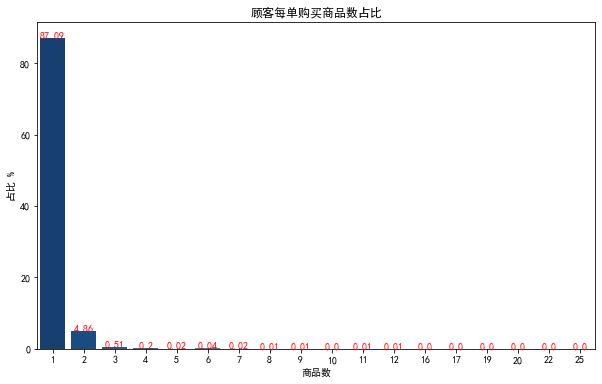

In [ ]:
# 作图显示顾客购买商品数占比
g = sns.barplot(x='商品数', y='订单数占比', data=products_dist, palette='Blues_r')

# 柱状图上显示刻度
for index, row in products_dist.iterrows():
    print(row)
    g.text(row.name,row['订单数占比'], round(row['订单数占比'],2), color='red', ha="center")

plt.xlabel('商品数') # 设置x轴标签
plt.ylabel('占比 %') # 设置y轴标签
plt.title('顾客每单购买商品数占比') # 设置图片标题
plt.show()

由顾客每单购买商品数分布图可知，87.09% 的顾客订单中只包含一件商品，包含两件商品的顾客订单数占比 4.86%，包含五件及以上商品的顾客订单数仅占 0.12%，顾客消费单一。

## Step 3 每月订单平均消费金额分析

### 1.分组聚合得到 2017 年各个月份的订单平均消费金额：

In [ ]:
# 提取出 2017 年的数据，分组聚合得到每个月每个订单的付款金额的总和
df_month_order_sales_2017 = df[df['年份']==2017].groupby(['月份','订单号']).agg({'付款金额':'sum', '年份':'mean'})
df_month_order_sales_2017.head(2)

付款金额      年份
月份 订单号                                            
1  001dbc16dc51075e987543d23a0507c7  87.90  2017.0
   00b4a910f64f24dbcac04fe54088a443  50.59  2017.0

In [ ]:
# 对结果进行行索引重置
df_month_order_sales_2017 = df_month_order_sales_2017.reset_index()
df_month_order_sales_2017.head(2)

,月份,订单号,付款金额,年份
0,1,001dbc16dc51075e987543d23a0507c7,87.90,2017.0
1,1,00b4a910f64f24dbcac04fe54088a443,50.59,2017.0


In [ ]:
# 对上述结果分组聚合得到每个月的订单数，以及付款金额的总和，并对结果进行行索引重置
orders_purchased_2017 = df_month_order_sales_2017.groupby('月份').agg({'订单号':'count','付款金额':'sum', '年份':'mean'}).reset_index()
orders_purchased_2017.head(2)

,月份,订单号,付款金额,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


In [ ]:
# 字段重命名
orders_purchased_2017 = orders_purchased_2017.rename(columns={'订单号':'订单总数', '付款金额':'付款金额总和'})
orders_purchased_2017.head(2)

,月份,订单总数,付款金额总和,年份
0,1,778,142637.61,2017.0
1,2,1681,290368.21,2017.0


In [ ]:
# 计算每个月中订单的平均付款金额，结果保留两位小数
orders_purchased_2017['avg_order_payment'] = (orders_purchased_2017['付款金额总和']/orders_purchased_2017['订单总数']).round(2)
orders_purchased_2017.head(2)

,月份,订单总数,付款金额总和,年份,avg_order_payment
0,1,778,142637.61,2017.0,183.34
1,2,1681,290368.21,2017.0,172.74


### 2.分组聚合得到 2018 年各个月份的订单平均消费金额：

In [ ]:
# 提取出 2018 年的数据，分组聚合得到每个月每个订单的付款金额的总和，并对结果进行行索引重置
df_month_order_sales_2018 = df[df['年份']==2018].groupby(['月份','订单号']).agg({'付款金额':'sum', '年份':'mean'}).reset_index()
df_month_order_sales_2018.head(2)

,月份,订单号,付款金额,年份
0,1,000229ec398224ef6ca0657da4fc703e,216.87,2018.0
1,1,0011d82c4b53e22e84023405fb467e57,315.33,2018.0


In [ ]:
# 对上述结果分组聚合得到每个月的订单数，以及付款金额的总和，并对结果进行行索引重置
orders_purchased_2018 = df_month_order_sales_2018.groupby('月份').agg({'订单号':'count','付款金额':'sum', '年份':'mean'}).reset_index()
orders_purchased_2018.head(2)

,月份,订单号,付款金额,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [ ]:
# 字段重命名
orders_purchased_2018 = orders_purchased_2018.rename(columns={'订单号':'订单总数', '付款金额':'付款金额总和'})
orders_purchased_2018.head(2)

,月份,订单总数,付款金额总和,年份
0,1,7039,1153357.23,2018.0
1,2,6586,1014437.97,2018.0


In [ ]:
# 计算每个月中订单的平均付款金额，结果保留两位小数
orders_purchased_2018['avg_order_payment'] = (orders_purchased_2018['付款金额总和']/orders_purchased_2018['订单总数']).round(2)
orders_purchased_2018.head(2)

,月份,订单总数,付款金额总和,年份,avg_order_payment
0,1,7039,1153357.23,2018.0,163.85
1,2,6586,1014437.97,2018.0,154.03


In [ ]:
# 整合 2017 年和 2018 年数据
orders_purchased_all = orders_purchased_2017.append(orders_purchased_2018).reset_index()
orders_purchased_all.head(2)

,index,月份,订单总数,付款金额总和,年份,avg_order_payment
0,0,1,778,142637.61,2017.0,183.34
1,1,2,1681,290368.21,2017.0,172.74


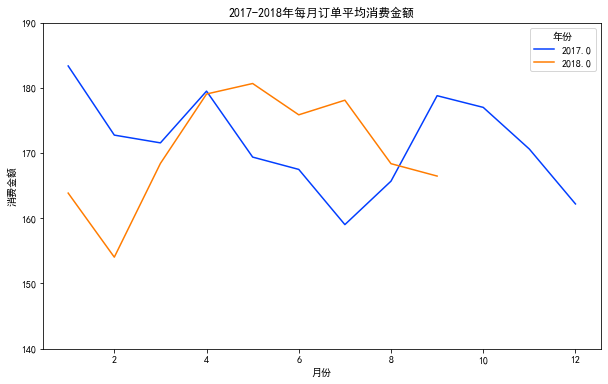

In [ ]:
# 作图表示 2017-2018 年各个月份订单平均消费金额
sns.lineplot(x='月份', y='avg_order_payment',data=orders_purchased_all, hue='年份', palette='bright')
plt.ylim(140,190)
plt.xlabel('月份')      # 设置x轴标签
plt.ylabel('消费金额')  # 设置y轴标签
plt.title('2017-2018年每月订单平均消费金额')  # 设置图片标题
plt.show()

每月订单平均消费金额 = 每月消费金额 / 每月订单数，平台每月订单平均消费金额在 150-185 之间，平台保持规模发展的同时需提高订单平均金额。

# Part 4 RFM客户分群

> 通过RFM用户分群分析，对不同用户群体进行精细化运营，重要价值用户是需要重点维护的优质用户，可为他们提供更优质的会员、反馈服务等；对于较长时间没有消费的重要保持用户需积极唤回，促使其保持消费；重要发展用户具备发展潜力，需不断引导，重点培养，提高忠诚度；重要挽留用户同样需要加强唤回策略，刺激消费，减少流失。

1. R、F、M三个指标的计算
2. 对 R、F、M的值进行打分
3. 对客户进行分群并用饼图显示占比

## Step 1 R、F、M 各个指标的计算

In [ ]:
# 设置当前日期为最后一次交易日期
today = df['订单时间'].max()

# 自定义函数 convert_to_days 用来计算日期间隔
def convert_to_days(date):
    time_delta = today - date.max()
    return time_delta.days

In [ ]:
df.head(2)

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述,年份,月份,星期几
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.12,87285b34884572647811a353c7ac498a,housewares,2017,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2.00,87285b34884572647811a353c7ac498a,housewares,2017,10,0


In [ ]:
# 分组聚合得到每个顾客的 R、F、M 三个指标的数据
import numpy as np

df_rfm = df.groupby('顾客ID').agg({'订单时间': convert_to_days, '订单号': min, '付款金额': 'sum'})
df_rfm.head(2)

,订单时间,订单号,付款金额
顾客ID,,,
00012a2ce6f8dcda20d059ce98491703,292,5f79b5b0931d63f1a42989eb65b9da6e,114.74
000161a058600d5901f007fab4c27140,413,a44895d095d7e0702b6a162fa2dbeced,67.41


In [ ]:
# 对上面的结果进行行索引重置，不需要顾客ID
df_rfm = df_rfm.reset_index(drop=True)
df_rfm.head(2)

,订单时间,订单号,付款金额
0,292,5f79b5b0931d63f1a42989eb65b9da6e,114.74
1,413,a44895d095d7e0702b6a162fa2dbeced,67.41


In [ ]:
# 字段重命名
df_rfm = df_rfm.rename(columns={'订单时间': 'R', '订单号': 'F', '付款金额': 'M'})
df_rfm.head(2)

,R,F,M
0,292,5f79b5b0931d63f1a42989eb65b9da6e,114.74
1,413,a44895d095d7e0702b6a162fa2dbeced,67.41


## Step 2 分别对 R、F、M 三个指标进行分组并打分

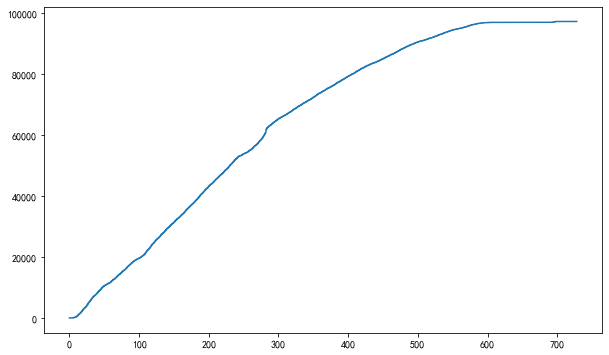

In [ ]:
# 画 R 值散点图，便于后续对数据进行分组
x = df_rfm['R'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

In [ ]:
 # 计算 R 值评分，拐点在 600 左右，600 以上是一个级别，600 以下平均分成四份
def calculate_R_score(r):
    if r <= 150:
        return 5
    elif r <= 300:
        return 4
    elif r <= 450:
        return 3
    elif r <= 600:
        return 2
    else:
        return 1

df_rfm['R评分'] = df_rfm['R'].agg(calculate_R_score)

In [ ]:
df_rfm.head(2)

,R,F,M,R评分
0,292,5f79b5b0931d63f1a42989eb65b9da6e,114.74,4
1,413,a44895d095d7e0702b6a162fa2dbeced,67.41,3


In [ ]:
# 画 F 值散点图，便于后续对数据进行分组
x = df_rfm['F'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

KeyboardInterrupt: 

In [ ]:
 # 计算 F 值评分，拐点在 4，所以 4 以上是一个级别，4 以下平均分成四份
def calculate_F_score(f):
    if f <= 1:
        return 1
    elif f <= 2:
        return 2
    elif f <= 3:
        return 3
    elif f <= 4:
        return 4
    else:
        return 5

df_rfm['F评分'] = df_rfm['F'].agg(calculate_F_score)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
df_rfm.head(2)

In [ ]:
# 画 M 值散点图，便于后续对数据进行分组
x = df_rfm['M'].sort_values()
y = df_rfm.index

plt.plot(x, y)
plt.show()

In [ ]:
# M 的拐点不容易观察，可以打印出 20%，40%，60%，80% 分位的分界点，这样可以使五个区间的人数基本平均
print('第一个分界点是：{}'.format(df_rfm['M'].quantile(0.2)))
print('第二个分界点是：{}'.format(df_rfm['M'].quantile(0.4)))
print('第三个分界点是：{}'.format(df_rfm['M'].quantile(0.6)))
print('第四个分界点是：{}'.format(df_rfm['M'].quantile(0.8)))

In [ ]:
# 计算 M 值评分，根据上面打印的四个分界点，将区间分成五份
def calculate_M_score(m):
    if m <= 54:
        return 1
    elif m <= 86:
        return 2
    elif m <= 130:
        return 3
    elif m <= 210:
        return 4
    else:
        return 5

df_rfm['M评分'] = df_rfm['M'].agg(calculate_M_score)

In [ ]:
df_rfm.head(2)

In [ ]:
# 分别求出R评分、F评分、M评分的平均值
r_avg = df_rfm['R评分'].mean()
f_avg = df_rfm['F评分'].mean()
m_avg = df_rfm['M评分'].mean()

print('R评分的平均值是：{}//n'.format(r_avg))
print('F评分的平均值是：{}\n'.format(f_avg))
print('M评分的平均值是：{}\n'.format(m_avg))

In [ ]:
# 将 df_rfm 中的'R评分'，'F评分'，和'M评分'的数值与相应的平均值比较
# 每个评分大于相应的平均值，则标记为‘1’，对应的价值是‘高’，否则标记为‘0’，对应的价值是‘低’
df_rfm['R评分'] = (df_rfm['R评分'] > r_avg)*1
df_rfm['F评分'] = (df_rfm['F评分'] > f_avg)*1
df_rfm['M评分'] = (df_rfm['M评分'] > m_avg)*1

In [ ]:
# 得到 R、F、M 三个指标得分高低值
df_rfm.head(10)

In [ ]:
# 拼接R评分、F评分、M评分
score = df_rfm['R评分'].astype(str) + df_rfm['F评分'].astype(str) + df_rfm['M评分'].astype(str)
score.head(10)

## Step 3 对顾客进行分群并作图

In [ ]:
# 将得分高低值转换为文字表达形式
transform_label = {
    '111':'重要价值用户',
    '101':'重要发展用户',
    '011':'重要保持用户',
    '001':'重要挽留用户',
    '110':'一般价值用户',
    '100':'一般发展用户',
    '010':'一般保持用户',
    '000':'一般挽留用户'
}

# 将 RFM 评分替换成具体的顾客类型
df_rfm['顾客类型'] = score.replace(transform_label)
df_rfm

In [ ]:
# 分组聚合得到每个类型的顾客数，以'顾客类型'分组，对其中一个字段计数就可以得到每个顾客类别的人数
df_classes_count = df_rfm.groupby('顾客类型')['R'].count().reset_index()
df_classes_count

In [ ]:
# 绘制饼图，数据为每一类顾客类型所对应的人数，标签为每一类的顾客类型，保留小数点后一位
# startangle 是指饼图起点的旋转角度
plt.pie(x=df_classes_count['R'], labels=df_classes_count['顾客类型'], autopct='%.1f%%', startangle=180)
plt.show()

# 结论和建议

综合上文分析，对京东电子商务平台的用户消费行为特点进行总结：
1. 用户消费订单金额集中在较低金额水平，单笔订单大部分仅购买一件产品
2. 平台消费用户具有低频小额消费的特点，用户消费单一，忠诚度低
3. 重要价值用户消费能力高、忠诚度高，是实现精细化运营策略的优质目标群体，应该提高用户向这部分用户的转化。

根据业务发展情况和用户消费行为特点，提出以下建议：
1. 从用户消费的角度来看：结合用户互动行为和访问信息，发掘潜在用户需求，适时推送产品内容、优惠信息，促使用户首次消费。根据快销品的消耗周期，及时触发用户二次购买，根据用户购买路径，智能推荐关联产品组合，激发需求，引导用户二次消费，培养用户消费习惯。促销是用户消费的重要影响因素，通过折扣价、优惠券、买赠、换购等方式拉动用户消费、增量购买、交叉购买，提高客单价。
2. 从用户运营的角度来看：根据用户分群结构，识别高价值用户特征，获取高潜力、高消费意愿的用户是运营的重心，平台制定用户精细化运营策略时需衡量成本与效益。重要价值用户是需要重点维护的优质用户，通过提供积分礼品、会员优惠、增值服务等方式，提升用户满意度。根据高价值用户特征，挖掘高消费潜力的用户，重点营销和培养，提高用户忠诚度。对于用户流失和挽留，需衡量用户价值和挽留成本。